In [43]:
#Imports Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
#Loads Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [45]:
#Converting into DataFrame
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['Target'] = iris.target

In [46]:
#Exploring the Data
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  


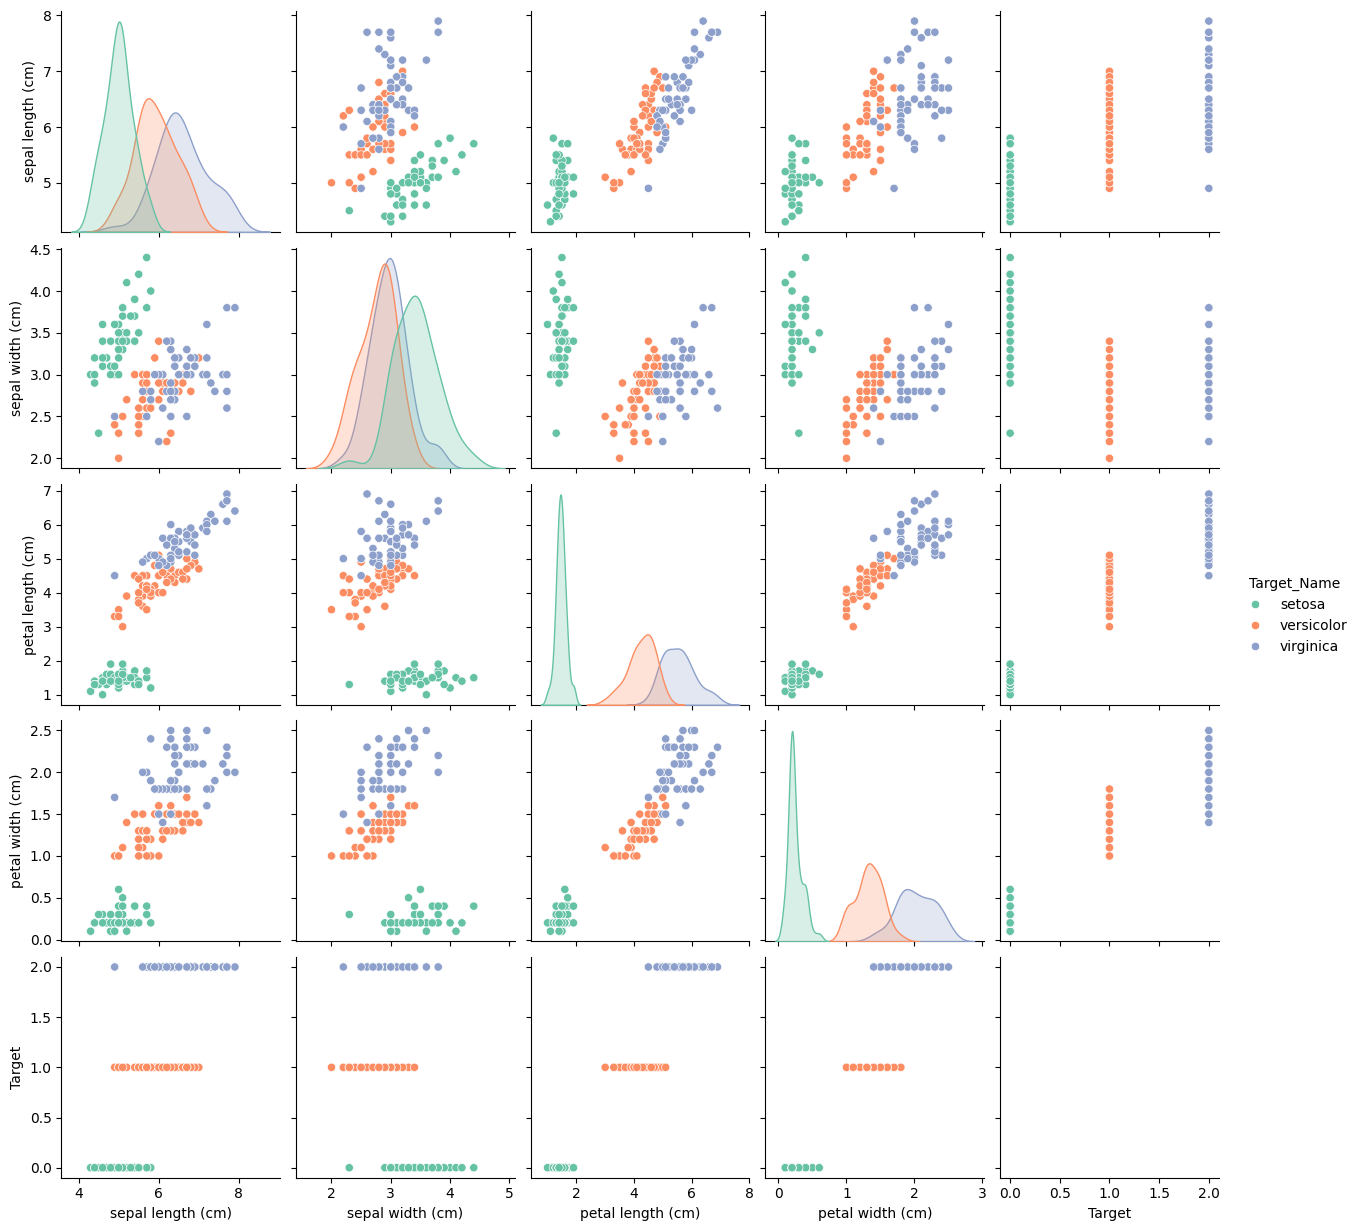

In [47]:
#Visualizing the data(Pairplots)
df['Target_Name'] = df['Target'].map({i: name for i, name in enumerate(target_names)})
sns.pairplot(df, hue='Target_Name', palette='Set2')
plt.show()

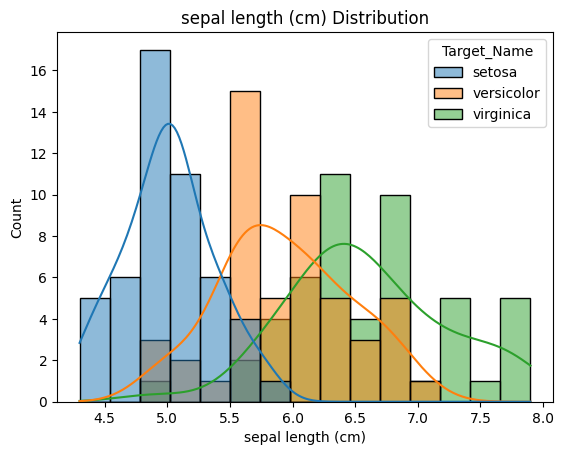

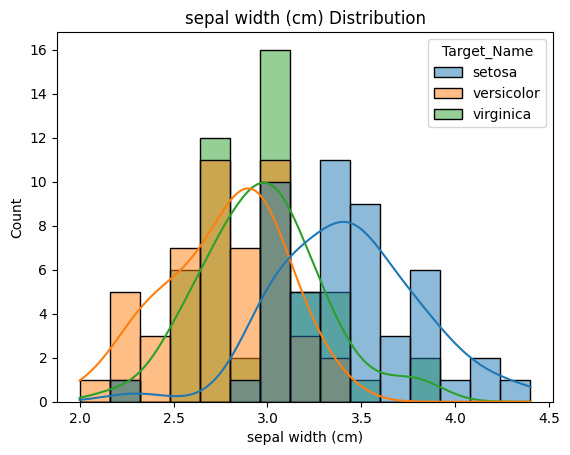

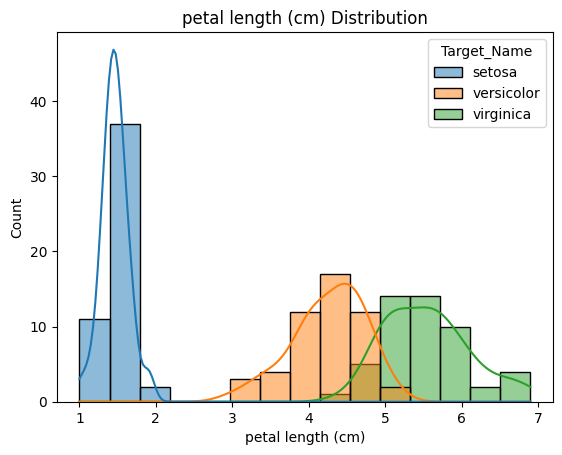

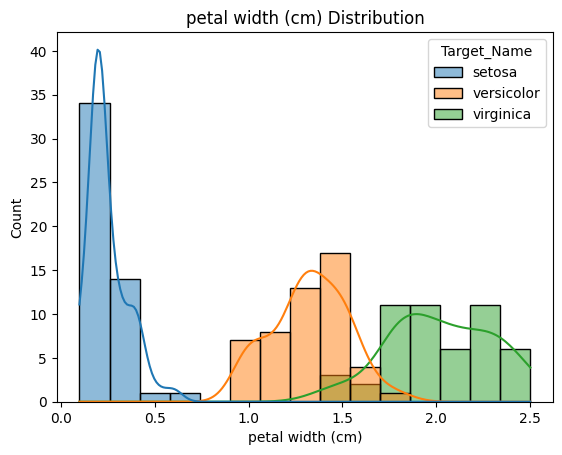

In [48]:
#Visualizing the data(Histogram)
for col in iris.feature_names:
    sns.histplot(data=df, x=col, hue='Target_Name', kde=True, bins=15)
    plt.title(f'{col} Distribution')
    plt.show()

In [49]:
#Train-Test Split
X = df.drop(['Target', 'Target_Name'], axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#Model Training (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
# Predict species for test data
y_pred = knn.predict(X_test)
for i in range(5):
    print("Actual:", target_names[y_test.iloc[i]], "| Predicted:", target_names[y_pred[i]])

Actual: versicolor | Predicted: versicolor
Actual: setosa | Predicted: setosa
Actual: virginica | Predicted: virginica
Actual: versicolor | Predicted: versicolor
Actual: versicolor | Predicted: versicolor


In [52]:
# Prediction with new input
new_data = pd.DataFrame([[5.9, 2.8, 4.2, 1.3]], columns=iris.feature_names)
pred = knn.predict(new_data)
print("Predicted species:", target_names[pred[0]])

Predicted species: versicolor


In [53]:
#Evaluating the result
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


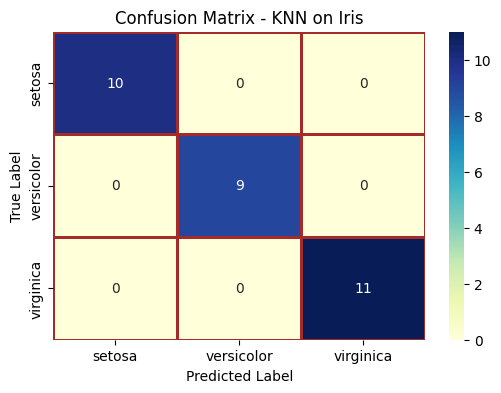

In [56]:
#Visualizing the Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=target_names, yticklabels=target_names,
            linewidths=1,     
            linecolor='brown')
plt.title("Confusion Matrix - KNN on Iris")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()